# Athlete Image Classification

In [1]:
# Import libraries
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import sample image in CV2
img = cv2.imread('test_images/sharapova1.jpg') 
img.shape

(555, 700, 3)

- Shape of Image
    - 500 --> X axis
    - 700 --> Y axis
    - 3 --> RGB Channel

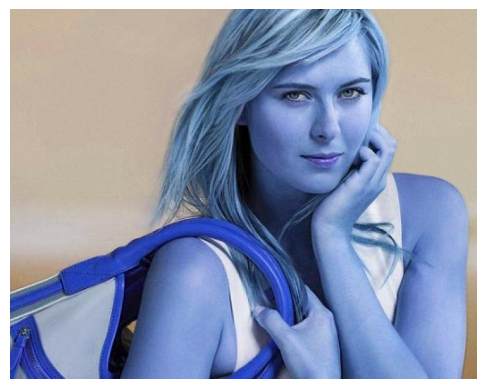

In [3]:
# Display image
plt.imshow(img)
plt.axis('off')  # turn off axis
plt.show()

- CV2 imports images in BGR (Blue, Green, Red) format by default, whereas Matplotlib displays images in RGB (Red, Green, Blue)
- Conversion of BGR to RGB is required before displaying images with Matplotlib

In [4]:
# Convert BGR to RBG
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

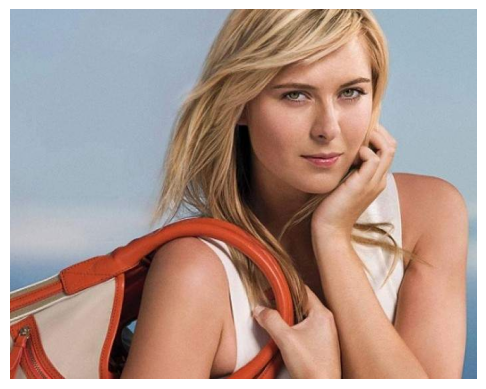

In [5]:
# Display image
plt.imshow(img_rgb)
plt.axis('off')  # turn off axis
plt.show()

In [6]:
# Convert colour image to gray image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

- Gray image remove third coloured dimension

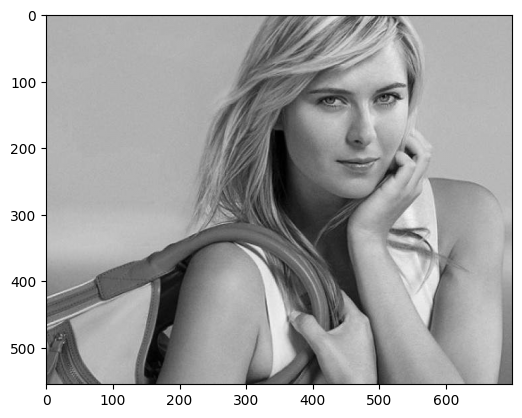

In [7]:
# Display gray image
plt.imshow(gray, cmap='gray')
#plt.axis('off')  # turn off axis
plt.show()

***Haarcascade Method***

In [8]:
# Utilizing pre-trained haarcascade functions from opencv

# Haarcascade for face
face_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_frontalface_default.xml')

# Haarcascade for eyes
eye_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]], dtype=int32)

- 'detectMultiScale' method detects the number of faces present in the image 'gray'
- It returns a multidimensional array of values, each dimension corresponding to separate face.
- Here, it returns one dimensional array due to presence of a single face in the image.
- array([[352,  38, 233, 233]], dtype=int32), The four values in each dimension correspond to:
    - X --> 352, starting X coordinate of face
    - Y --> 38, starting Y coordinate of face
    - Width --> 233, width of face
    - Height --> 233 ,  height of face

In [9]:
# Storing the array values in variables
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(352), np.int32(38), np.int32(233), np.int32(233))

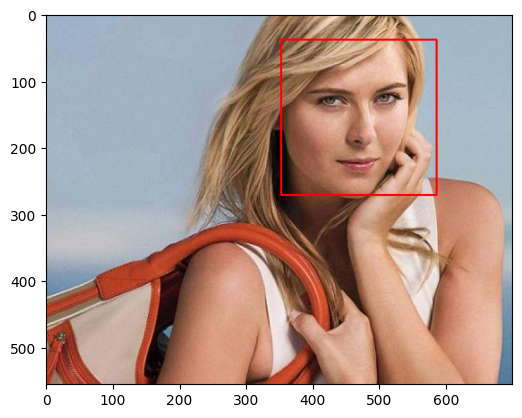

In [10]:
# Draw a rectangle on the face area in the image
face_img = cv2.rectangle(img_rgb, (x,y), (x+w,y+h), (255,0,0),2)
plt.imshow(face_img)
plt.show()

face_img = cv2.rectangle(img_rgb, (x,y), (x+w,y+h), (255,0,0),2)
- img_rgb --> Image
- (x,y) --> Starting corner coordinate of the rectangle
- (x+w,y+h) --> Width, height of the rectangle
-  (255,0,0) --> Red colour for rectangle

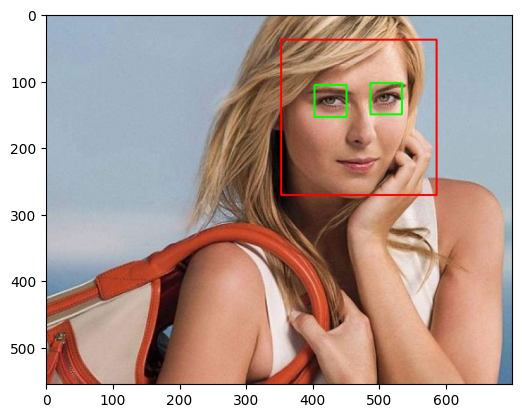

In [11]:
# Simultaneous Face and Eye cascade

cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img_rgb, (x,y), (x+w,y+h), (255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]  # ROI --> Region of Interest
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey), (ex+ew, ey+eh), (0,255,0),2)

plt.figure()
plt.imshow(face_img)
plt.show()

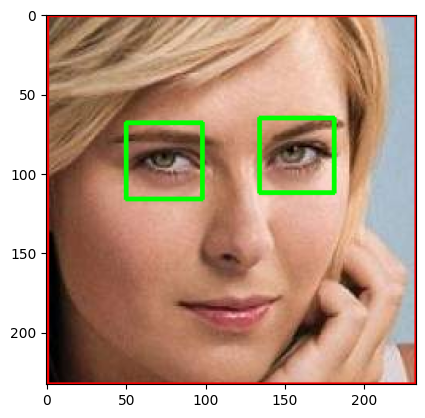

In [12]:
# Display on cropped ROI region

%matplotlib inline
plt.imshow(roi_color)
plt.show()

In [13]:
# Function to get cropped images of ROI region of images with both eyes visible

def cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color

In [14]:
# Cropped Image
image = cropped_image('test_images/sharapova1.jpg')
image

array([[[ 84, 105, 126],
        [ 66,  86, 104],
        [ 50,  69,  90],
        ...,
        [199, 185, 162],
        [199, 185, 162],
        [199, 185, 162]],

       [[ 73,  93, 111],
        [ 53,  73,  91],
        [ 41,  60,  81],
        ...,
        [199, 185, 162],
        [199, 185, 162],
        [198, 184, 161]],

       [[ 68,  88, 106],
        [ 52,  69,  88],
        [ 45,  64,  85],
        ...,
        [200, 186, 163],
        [200, 186, 163],
        [201, 187, 164]],

       ...,

       [[ 10,   6,  11],
        [  5,   2,   4],
        [  0,   0,   1],
        ...,
        [109, 128, 185],
        [102, 123, 184],
        [105, 127, 193]],

       [[  9,   5,  10],
        [  4,   1,   3],
        [  0,   0,   1],
        ...,
        [110, 130, 185],
        [102, 123, 184],
        [106, 128, 194]],

       [[  8,   4,   9],
        [  2,   0,   1],
        [  0,   0,   1],
        ...,
        [112, 132, 187],
        [101, 122, 183],
        [105, 127, 193]]

In [15]:
# Cropped image where both eyes are not visible
image_cropped = cropped_image('test_images/sharapova2.JPG')
image_cropped

- 'cropped_image' function returns empty array for single eyed photo implies the function works properly

***Cropped Image Dataset***

In [16]:
# Setting directory path
path_to_data = './dataset/'
path_to_cropped_data = './dataset/cropped/'

In [17]:
# Generate path for image dataset directories
import os

img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

img_dirs

['./dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [18]:
# Generate folder for cropped images
import shutil

# If folder exist, remove it. Helpful in multiple runs
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)

# Create new folder directory
os.mkdir(path_to_cropped_data)

In [19]:
# Saving Cropped Images

# Directories for each athlete
cropped_image_dirs = []

# Dictionary containing path to each cropped image per athelete
athlete_image_names = {}

for img_dir in img_dirs:
    count = 1
    athlete_name = img_dir.split('/')[-1]
    print(athlete_name)
    athlete_image_names[athlete_name] = []

    for entry in os.scandir(img_dir):
        roi_color = cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + athlete_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('Generating cropped images in folder: ', cropped_folder)
            
            cropped_image_name = f'{athlete_name}{count}.png'
            cropped_image_path = os.path.join(cropped_folder, cropped_image_name)

            cv2.imwrite(cropped_image_path, roi_color)
            athlete_image_names[athlete_name].append(cropped_image_path)
            count += 1 


lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


## Data Cleaning

- Now we will manually remove erroneous images from the cropped image dataset

## Feature Engineering

In [20]:
import numpy as np
import pywt

In [21]:
# Wavelet Transform

def w2d(img, mode='haar', level=1):
    imArray = img

    # Convert to grayscale if needed
    if len(imArray.shape) == 3:
        imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)

    # Convert to float
    imArray = np.float32(imArray)
    imArray /= 255.0

    # Compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    # Set approximation coefficients to zero
    coeffs_H = list(coeffs)
    coeffs_H[0] = np.zeros_like(coeffs_H[0])

    # Reconstruct image from detail coefficients
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(np.clip(imArray_H, 0, 255))

    return imArray_H


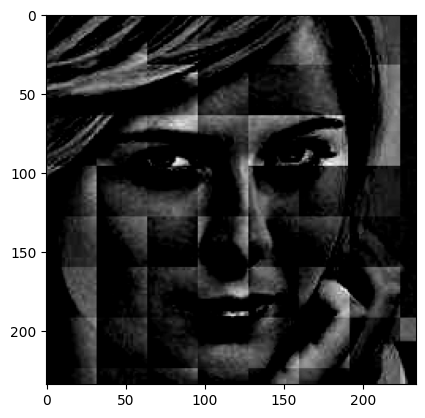

In [22]:
# Wavelet Transformer Image
im_har = w2d(image, 'db1', 5)
plt.imshow(im_har, cmap='gray')
plt.show()

In [23]:
# Target class dictionary
class_dict = {}
count = 0 

for athlete_name in athlete_image_names.keys():
    class_dict[athlete_name] = count
    count +=  1

class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [ ]:
# Stacking Wavelet transformed and original cropped images together to form final dataset

X,y =[], []

for athlete_name, training_files in athlete_image_names.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_img_har.reshape(32-32,1)))
        X.append(combined_img)
        y.append(class_dict[athlete_name])

SyntaxError: expected ':' (521472469.py, line 8)